In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from src.models.classification.evaluate_models import ClassificationAnalysis
from src.models.classification.train_models import ClassificationTraining

In [2]:
samples_per_composition = 30

training = ClassificationTraining(samples_per_composition=samples_per_composition)
analysis = ClassificationAnalysis(samples_per_composition=samples_per_composition)

results = training.load_training_models()
indices = analysis.load_performance_indices()

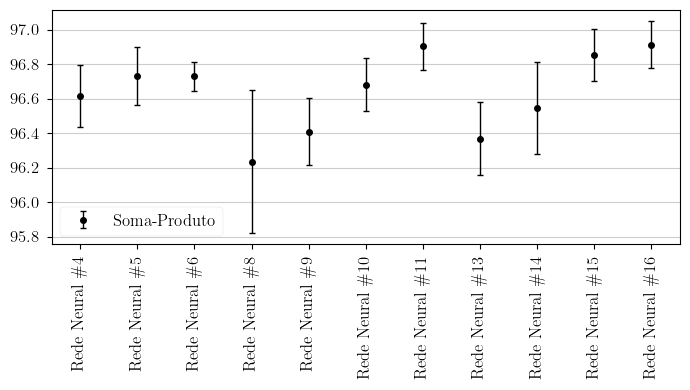

In [3]:
name = "sp_index"
# models = [i for i in range(19, 34)]
models = [21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33]

outputs = [output for i, output in enumerate(results["outputs"]) if i in models]
labels = [hp["model_name"].replace("#", "\#") for hp in outputs]
x = np.array([i + 1 for i in np.arange(len(outputs))])

f, ax = plt.subplots(figsize=(7, 4))

y = indices[name][:, models].mean(axis=0) * 100
y_err = (indices[name][:, models].std(axis=0) / np.sqrt(10 - 1)) * 100
kwargs = {"c": "C0", "fmt": "o", "ms": 4.0, "mew": 1.0, "elinewidth": 1.0, "capsize": 2.0, "capthick": 1.0}
ax.errorbar(x, y, y_err, label="Soma-Produto", **kwargs)
ax.yaxis.grid()
ax.set_xticks(x, labels, rotation=90, ha="center")
ax.legend(loc="lower left")

f.tight_layout()
f.savefig(os.path.join("notebooks", f"{name}_errorbar_plot_alt.png"), dpi=600)